In [1]:
import pandas as pd
import numpy as np
import time
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR


from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve 
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('DatasetPerovskitasJuan.csv') #Aqui lo que se hace es cargar los datos.
df = shuffle(df, random_state=2)
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('ID', axis = 1)
df = df.drop('full_formula', axis = 1)
x = df.drop('Energy', axis = 1)
x = x.drop('Energy_per_atom', axis = 1)
x = x.drop('Formation_energy_per_atom', axis = 1)
x = x.drop("Band_gap",axis = 1)
x = x.drop("E_above_hull",axis = 1) 
y = np.asarray(df['E_above_hull'])
x = (x-x.mean())/x.std()
y = (y-y.mean())/y.std()
x = x.fillna(0)

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=9)

In [3]:
x

,Nsites,Nelements,A Z,A Period_Number,A Group_Number,A Electronegativity,A Covalent_radius,A Valence_Electrons,A Ionization_Energy,A Electron_Afinity,...,X6 Covalent_radius,X6 Valence_Electrons,X6 Ionization_Energy,X6 Electron_Afinity,X6 Block,X6 Volume,X6 Density,X6 Atomic_Weight,volume-py,density-py
1757,1.086266,1.807630,-0.262506,-0.035460,-0.668732,-0.126304,0.388098,-0.375280,-0.133066,-0.162396,...,1.497710,1.702615,1.726914,2.279874,1.807630,1.156195,1.910338,1.322502,0.082701,-0.208700
1822,1.086266,1.807630,-0.262506,-0.035460,-0.668732,-0.126304,0.388098,-0.375280,-0.133066,-0.162396,...,1.497710,1.702615,1.726914,2.279874,1.807630,1.156195,1.910338,1.322502,0.188660,-0.500649
790,1.086266,-0.552907,-1.893552,-2.521765,-0.882646,0.678133,-2.313612,-0.375280,2.523697,-1.051020,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,0.114375,0.716606
470,-0.920080,-0.552907,0.529716,0.793308,-0.882646,-0.884773,1.106638,-0.375280,-0.996108,-0.632469,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.648490,0.250332
1108,1.086266,-0.552907,-0.309107,-0.035460,-0.882646,-0.746870,0.531806,-0.375280,-0.582567,-0.900214,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,2.286272,-0.878961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,1.086266,1.807630,0.576317,0.793308,-0.454817,-0.402111,0.876705,-0.375280,-0.683598,0.396249,...,1.497710,1.702615,1.726914,2.279874,1.807630,1.156195,1.910338,1.322502,0.421198,0.379687
1608,1.086266,1.807630,0.576317,0.793308,-0.454817,-0.402111,0.876705,-0.375280,-0.683598,0.396249,...,1.497710,1.702615,1.726914,2.279874,1.807630,1.156195,1.910338,1.322502,0.368117,0.996100
493,-0.920080,-0.552907,0.529716,0.793308,-0.882646,-0.884773,1.106638,-0.375280,-0.996108,-0.632469,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.307313,0.013506
527,-0.920080,-0.552907,1.042330,0.793308,1.684327,-0.103320,0.445581,1.374427,-0.302592,0.454140,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.529522,1.567716


In [4]:
Correlacion = df.corr(method = 'spearman')
for i in range(len(Correlacion['E_above_hull'])):
    print(list(Correlacion.index)[i], Correlacion['E_above_hull'][i])

Nsites -0.6000699001974799
Nelements -0.48624140349722533
A Z -0.10426393362783375
A Period_Number -0.22715069067248533
A Group_Number 0.35752258361135103
A Electronegativity 0.3962716632848197
A Covalent_radius -0.4404976938844958
A Valence_Electrons 0.29051239598031936
A Ionization_Energy 0.3735190403073974
A Electron_Afinity 0.12956554317499433
A Block 0.026313398996775973
A Volume -0.4342804315476783
A Density 0.1290505603589915
A Atomic_Weight -0.14807604926953677
A Z.1 -0.48554214142033975
A Period_Number.1 -0.49214300963441254
A Group_Number.1 -0.47773650463106726
A Electronegativity.1 -0.4622676216096165
A Covalent_radius.1 -0.49641949193725216
A Valence_Electrons.1 -0.4855646428204026
A Ionization_Energy.1 -0.46847053745716566
A Electron_Afinity.1 -0.4768211704342927
A Block.1 -0.4821274005701673
A Volume.1 -0.5002515689752451
A Density.1 -0.4786554032076126
A Atomic_Weight.1 -0.4906351112379453
B Z 0.05204278338277073
B Period_Number -0.0002706062802508305
B Group_Number 0.22

In [5]:
X_test

,Nsites,Nelements,A Z,A Period_Number,A Group_Number,A Electronegativity,A Covalent_radius,A Valence_Electrons,A Ionization_Energy,A Electron_Afinity,...,X6 Covalent_radius,X6 Valence_Electrons,X6 Ionization_Energy,X6 Electron_Afinity,X6 Block,X6 Volume,X6 Density,X6 Atomic_Weight,volume-py,density-py
728,-0.920080,-0.552907,-1.147931,-0.864229,-0.882646,-0.631950,-0.014284,-0.375280,-0.224679,-0.979814,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.472724,0.124823
1410,1.086266,1.807630,0.529716,0.793308,-0.882646,-0.884773,1.106638,-0.375280,-0.996108,-0.632469,...,3.240644,2.024627,1.509776,-0.438380,1.807630,2.823407,2.037134,3.334607,2.869992,-1.476715
231,-0.920080,-0.552907,0.576317,0.793308,-0.454817,-0.402111,0.876705,-0.375280,-0.683598,0.396249,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.453598,1.135279
811,-0.920080,-0.552907,2.347166,1.622077,0.828669,0.057567,0.100682,-0.375280,-0.329990,-1.051020,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.833146,1.663790
1210,-0.920080,-0.552907,-0.309107,-0.035460,-0.882646,-0.746870,0.531806,-0.375280,-0.582567,-0.900214,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.643189,-0.589156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,-0.920080,-0.552907,0.529716,0.793308,-0.882646,-0.884773,1.106638,-0.375280,-0.996108,-0.632469,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.526865,-0.453508
1235,1.086266,-0.552907,0.296709,-0.035460,1.898241,1.781360,-1.077723,2.249281,1.938918,2.046136,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,0.915553,-1.362633
523,-0.920080,-0.552907,-0.635317,-0.864229,1.470412,1.229746,-1.566330,0.499574,-0.322285,-0.182658,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.883786,-0.181905
718,-0.920080,-0.552907,-0.635317,-0.864229,1.470412,1.229746,-1.566330,0.499574,-0.322285,-0.182658,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.787980,1.240341


In [6]:
y.max()

7.970315878639033

<function matplotlib.pyplot.show(close=None, block=None)>

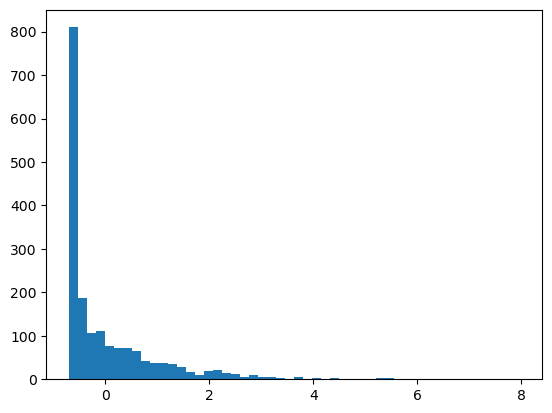

In [7]:
plt.hist(y, bins = 50)
plt.show

In [8]:
abr1 = GridSearchCV (AdaBoostRegressor (),{
    'random_state':[0,1,2], 'n_estimators':[1000], 'learning_rate':[0.001], 'loss': ['exponential']}, cv=5)
abr1.fit(X_train, y_train)
model = abr1.best_estimator_

Primero vemos las metricas
Model| R2 sq on train set: 0.4559
Model| R2 sq on test set: 0.2160
Model| MSE on test set: 0.8165
Model| MAE on test set: 0.5060
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

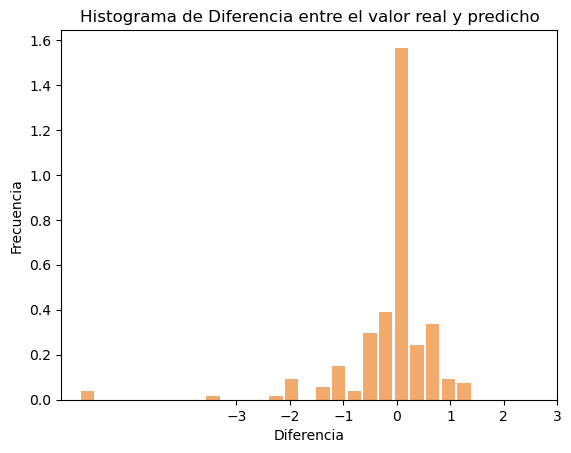

In [9]:
print('Primero vemos las metricas')
abr_score = model.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

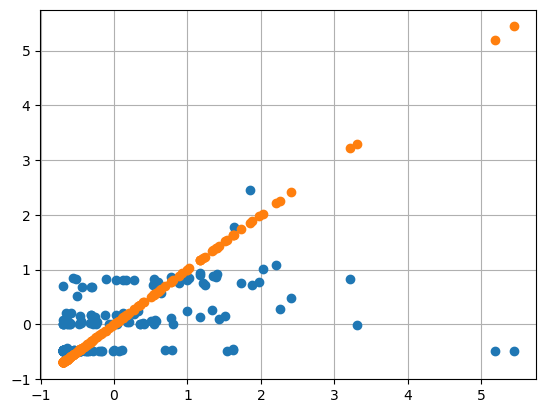

In [10]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [11]:
BR = GridSearchCV (linear_model.BayesianRidge(),{'tol':[1e-3]}, cv=5)
BR.fit(X_train, y_train) #Entrenamos el modelo
model1 = BR.best_estimator_ #Nos quedamos con el mejor modelo

Primero vemos las metricas
Model| R2 sq on train set: 0.4162
Model| R2 sq on test set: 0.3223
Model| MSE on test set: 0.7057
Model| MAE on test set: 0.5142
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

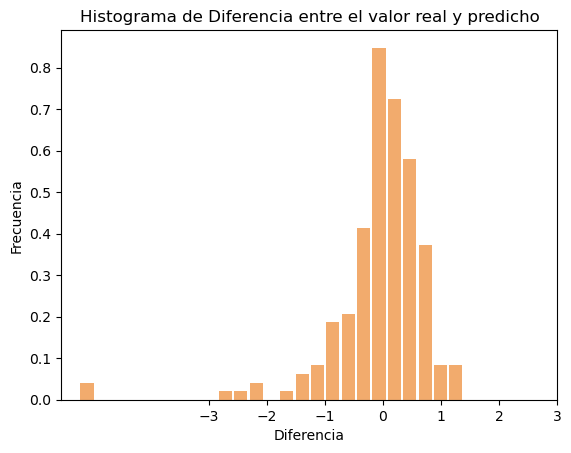

In [12]:
print('Primero vemos las metricas')
abr_score = model1.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model1.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model1.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

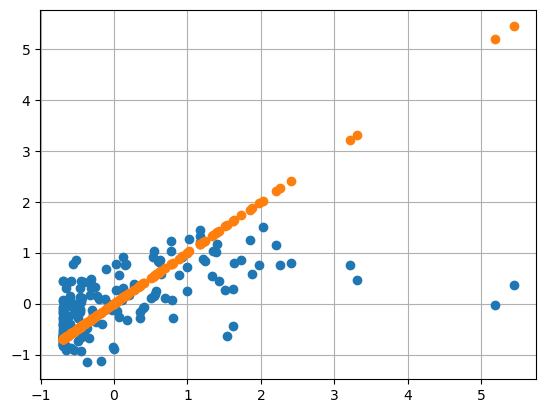

In [13]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [14]:
dtr1 = GridSearchCV (DecisionTreeRegressor(),{
    'criterion':['friedman_mse'], 'random_state':[0,1,2], 'splitter':['best'], 'max_depth':[None]}, cv=5, verbose = 3)
dtr1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model2 = dtr1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.176 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.447 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.353 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=-0.167 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.127 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.431 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.383 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.342 total time=   0.0s
[CV 4/5] EN

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.2691
Model| MSE on test set: 0.7611
Model| MAE on test set: 0.4030
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

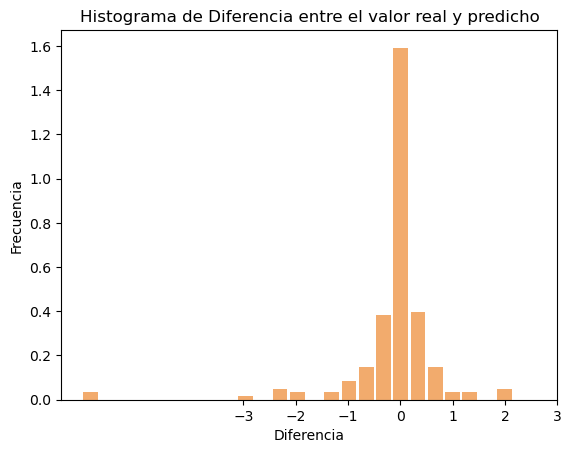

In [15]:
print('Primero vemos las metricas')
abr_score = model2.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model2.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model2.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

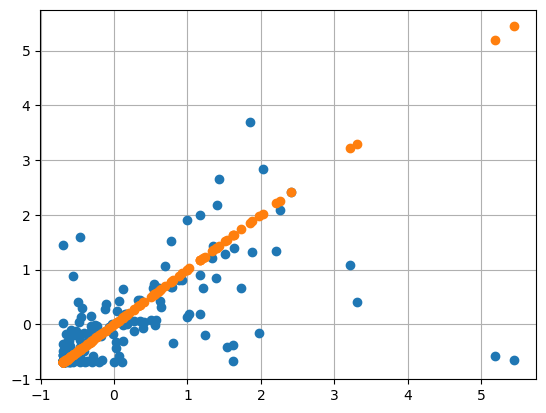

In [16]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [17]:
kernel = 15*RBF(1.0)+10*RBF(2.0)+5*RBF(3.0) #Definimos que tipo de kernel usar, en este caso uno contante de 15 y 2 tipo RBF
gpr1 = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel = kernel))
gpr1.fit(X_train, y_train) #Entrenamos el modelo
model3 = gpr1

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.4569
Model| MSE on test set: 0.5656
Model| MAE on test set: 0.3536
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

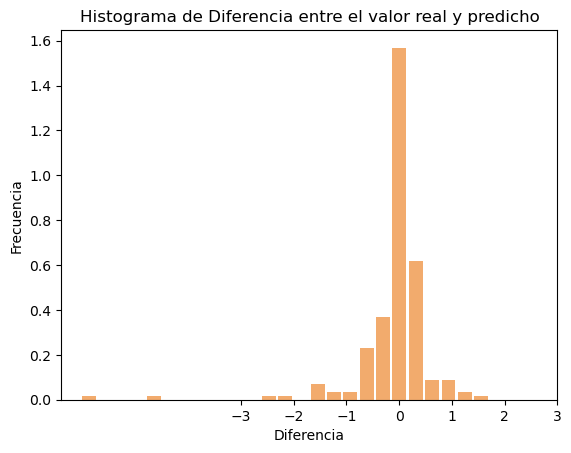

In [18]:
print('Primero vemos las metricas')
abr_score = model3.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model3.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model3.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

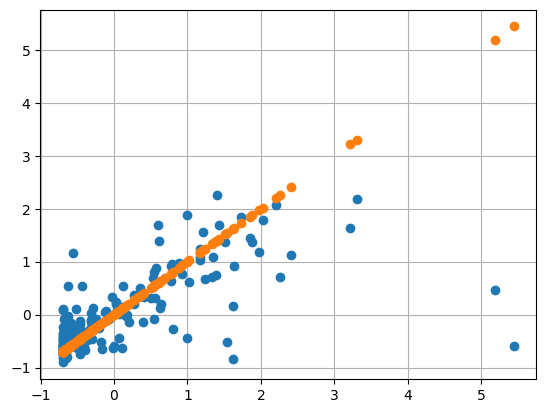

In [19]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [20]:
gbr = GridSearchCV(GradientBoostingRegressor (),{'n_estimators': [100,10,3], 'max_depth': [8], 'min_samples_split': [2], 'learning_rate': [0.1],
    'loss': ['squared_error'], 'random_state':[0,1,2]}, cv=5, verbose = 3)
#loss = 'ls', este es least squares
gbr.fit(X_train, y_train) #Entrenamos el modelo
model4 = gbr.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.584 total time=   1.6s
[CV 2/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.613 total time=   1.5s
[CV 3/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.601 total time=   1.7s
[CV 4/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.505 total time=   1.8s
[CV 5/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.338 total time=   1.8s
[CV 1/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=1;, score=0.575 total time=   1.7s
[CV 2/5] END learning_rate=0

Primero vemos las metricas
Model| R2 sq on train set: 0.9972
Model| R2 sq on test set: 0.5223
Model| MSE on test set: 0.4975
Model| MAE on test set: 0.3320
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

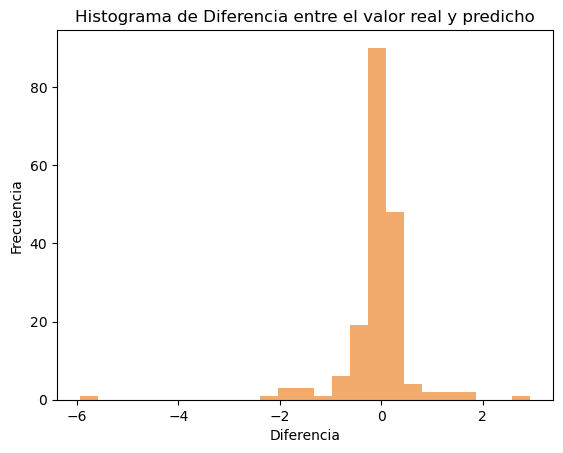

In [21]:
print('Primero vemos las metricas')
abr_score = model4.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model4.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model4.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D')
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
#plt.xticks(range(-3,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

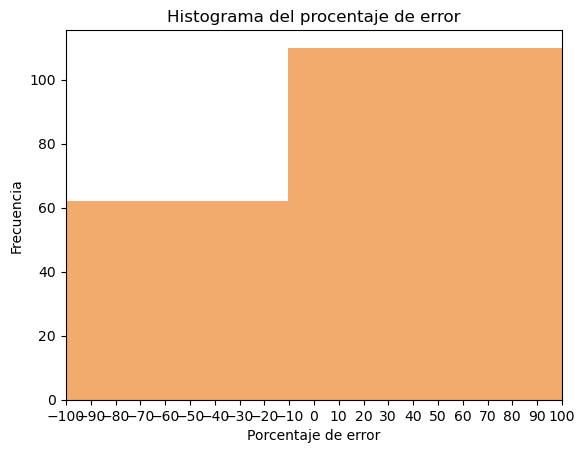

In [22]:
dif1 = (abs(yt - yp) / yt)*100
plt.hist(x=dif1, bins=500, color='#F2AB6D')
plt.title('Histograma del procentaje de error')
plt.xlabel('Porcentaje de error')
plt.ylabel('Frecuencia')
plt.xlim(-100,100)
plt.xticks(range(-100,101,10))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

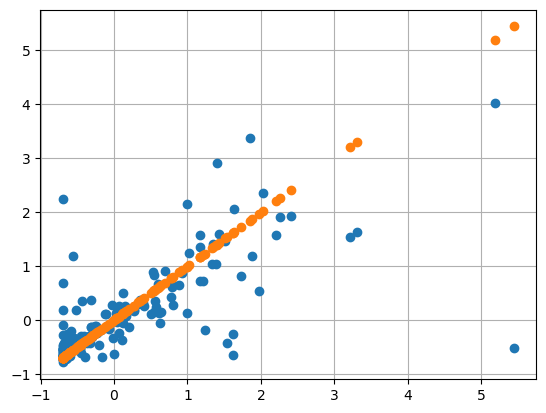

In [23]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [24]:
feature_importance = model4.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

In [25]:
sorted_idx

array([104,  90, 115,  89,  82, 106,  70,  86,  58,  94, 117, 102, 108,
        96,  92,  98, 103,  88,  99, 114, 101, 120, 112,  91, 111, 107,
        95,  15,  75,   1,  25, 109,  51, 110,  39,  43, 121,  49,  97,
        63, 100,  18, 105,  50,  68,  20,  93, 119,  46,  72,  21,  41,
        17,  38,  23, 116,  71,  87,  73,  84, 118,  48,  45,  61,  80,
        60,  67,  19,  53,  54,  40,  55,  78,  62,  27,  79,  85,  83,
        22,  59,  31,  74, 113,  66,  44,   3,  77,  81,  56,  57,  34,
        42,   7,  64,  69,  65,  47,  14,  52,  76,  28,  24,  10,  13,
        12,   2,  26,  32,  37,  16,   8,   4,   5,   0,  33,   6,  36,
        35,   9,  29,  30, 123,  11, 122], dtype=int64)

In [26]:
for i in sorted_idx:
    print(X_train.columns[i], feature_importance[i])

X5 Ionization_Energy 0.0
X4 Covalent_radius 0.0
X6 Valence_Electrons 0.0
X4 Electronegativity 0.0
X3 Block 0.0
X5 Block 0.0
X2 Block 0.0
X4 Z 0.0
X1 Block 0.0
X4 Block 0.0
X6 Electron_Afinity 0.0
X5 Covalent_radius 4.4180768741023825e-08
X5 Density 7.802031208762024e-08
X4 Density 1.3520602977392514e-07
X4 Ionization_Energy 1.4291936292222237e-07
X5 Z 3.3624267321110603e-07
X5 Valence_Electrons 3.760680520310438e-07
X4 Group_Number 6.312496943379697e-07
X5 Period_Number 6.332499987753909e-07
X6 Covalent_radius 7.63569893650694e-07
X5 Electronegativity 1.2076390239830216e-06
X6 Density 1.5415795584638415e-06
X6 Group_Number 1.5566913356576007e-06
X4 Valence_Electrons 1.8523342601753267e-06
X6 Period_Number 1.9782553317760563e-06
X5 Volume 2.0588898869789425e-06
X4 Volume 2.26114113536989e-06
A Period_Number.1 3.56576068637517e-06
X3 Period_Number 4.712227009447835e-06
Nelements 9.705019775670364e-06
A Atomic_Weight.1 1.1014686403116915e-05
X5 Atomic_Weight 1.1140458875075099e-05
X1 Peri

In [27]:
krr = GridSearchCV (KernelRidge (),{ 'alpha':[0.001],'kernel':['linear']}, cv=5,verbose=3)
krr.fit(X_train, y_train) #Entrenamos el modelo
model5 = krr.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ........alpha=0.001, kernel=linear;, score=0.306 total time=   0.0s
[CV 2/5] END ........alpha=0.001, kernel=linear;, score=0.346 total time=   0.0s
[CV 3/5] END ........alpha=0.001, kernel=linear;, score=0.394 total time=   0.0s
[CV 4/5] END ........alpha=0.001, kernel=linear;, score=0.475 total time=   0.0s
[CV 5/5] END .......alpha=0.001, kernel=linear;, score=-1.828 total time=   0.0s


Primero vemos las metricas
Model| R2 sq on train set: 0.4255
Model| R2 sq on test set: 0.3548
Model| MSE on test set: 0.6720
Model| MAE on test set: 0.5148
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

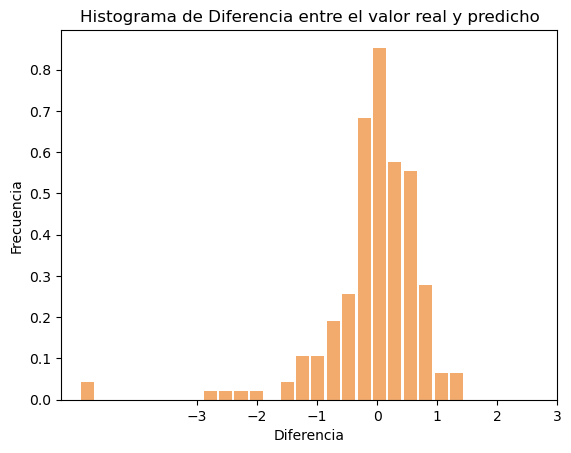

In [28]:
print('Primero vemos las metricas')
abr_score = model5.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model5.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model5.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

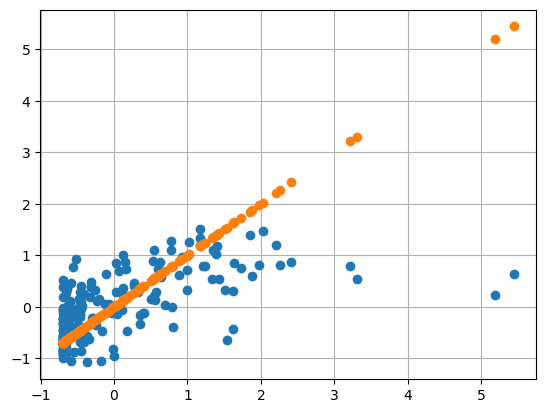

In [29]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [30]:
knr1 = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'ball_tree')
knr1.fit(X_train, y_train)
model6 = knr1

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.3363
Model| MSE on test set: 0.6913
Model| MAE on test set: 0.4056
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

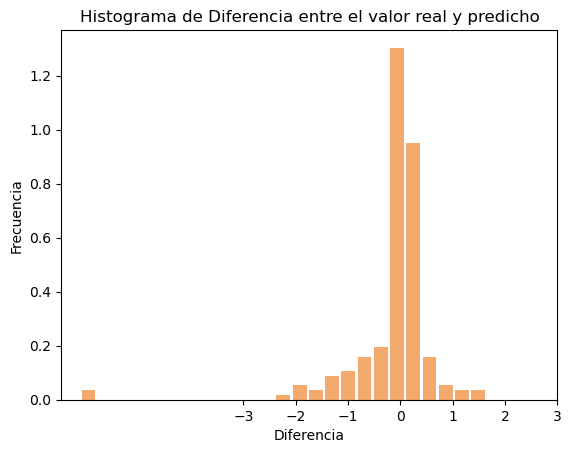

In [31]:
print('Primero vemos las metricas')
abr_score = model6.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model6.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model6.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

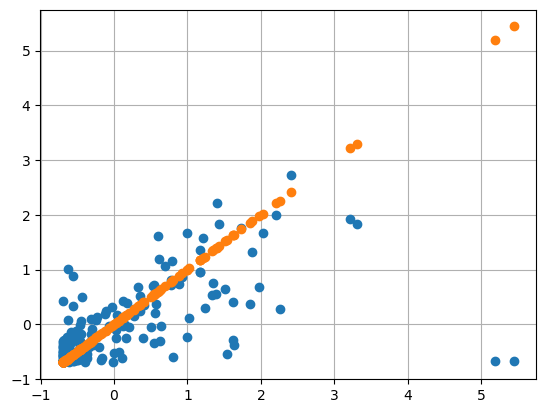

In [32]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [33]:
par = GridSearchCV (PassiveAggressiveRegressor(),{'max_iter':[1000], 'random_state':[10], 'tol':[1e-10]},
                   cv=5,verbose = 3)
#loss = 'ls', este es least squares
par.fit(X_train, y_train) #Entrenamos el modelo
model7 = par.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.086 total time=   0.0s
[CV 2/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.264 total time=   0.0s
[CV 3/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.210 total time=   0.0s
[CV 4/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.045 total time=   0.0s
[CV 5/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.145 total time=   0.0s


Primero vemos las metricas
Model| R2 sq on train set: -1.5114
Model| R2 sq on test set: -1.1280
Model| MSE on test set: 2.2162
Model| MAE on test set: 1.2529
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

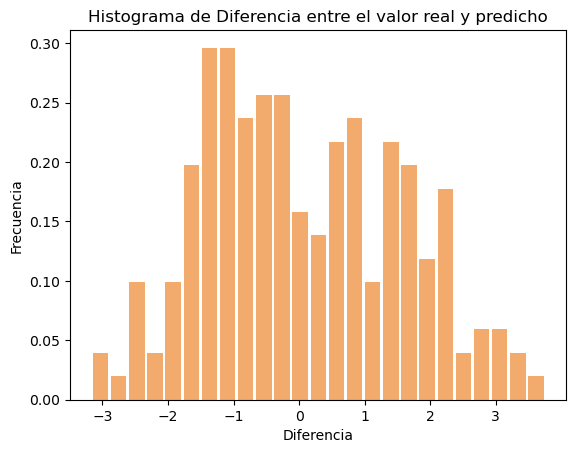

In [34]:
print('Primero vemos las metricas')
abr_score = model7.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model7.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model7.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

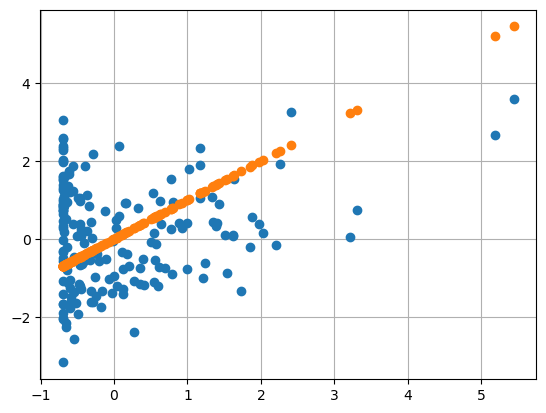

In [35]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [36]:
grid1 = GridSearchCV (RandomForestRegressor(),{'max_depth':[100], 'random_state':[0,1,2], 'criterion':['squared_error']
                                             }, cv=5, refit=True, verbose=3)
grid1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model8 = grid1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.614 total time=   2.6s
[CV 2/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.688 total time=   2.5s
[CV 3/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.663 total time=   2.4s
[CV 4/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.681 total time=   2.4s
[CV 5/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.363 total time=   2.3s
[CV 1/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.599 total time=   2.3s
[CV 2/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.699 total time=   2.4s
[CV 3/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.686 total time=   2.3s
[CV 4/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.673 total time=   2.3s
[CV 5/5] END criterion=squared_

Primero vemos las metricas
Model| R2 sq on train set: 0.9402
Model| R2 sq on test set: 0.4654
Model| MSE on test set: 0.5568
Model| MAE on test set: 0.3492
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

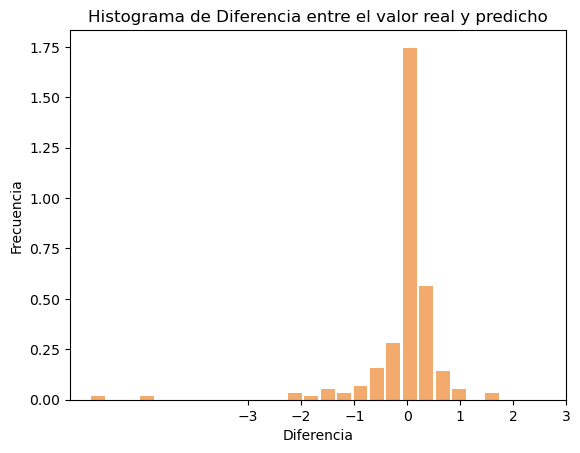

In [37]:
print('Primero vemos las metricas')
abr_score = model8.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model8.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model8.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

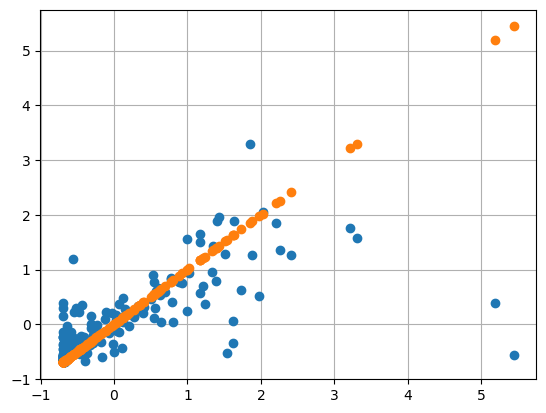

In [38]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [39]:
sgd = (make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000,tol=1e-1500,alpha=0.0001,epsilon=0.0001)))
sgd.fit(X_train, y_train) #Entrenamos el modelo
model9 = sgd #Nos quedamos con el mejor modelo

Primero vemos las metricas
Model| R2 sq on train set: -3330043.5003
Model| R2 sq on test set: -25123.7242
Model| MSE on test set: 26166.0136
Model| MAE on test set: 130.5601
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

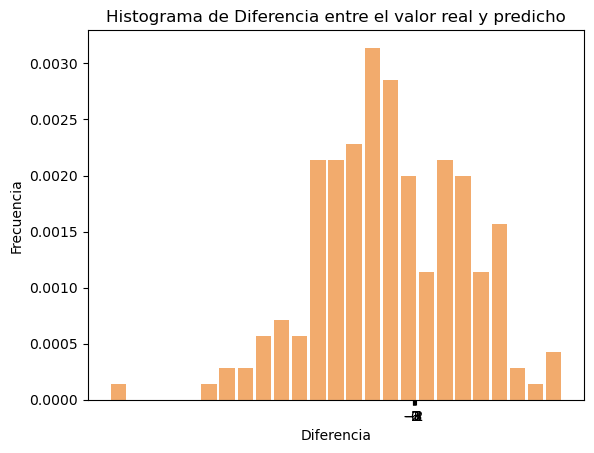

In [40]:
print('Primero vemos las metricas')
abr_score = model9.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model9.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model9.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

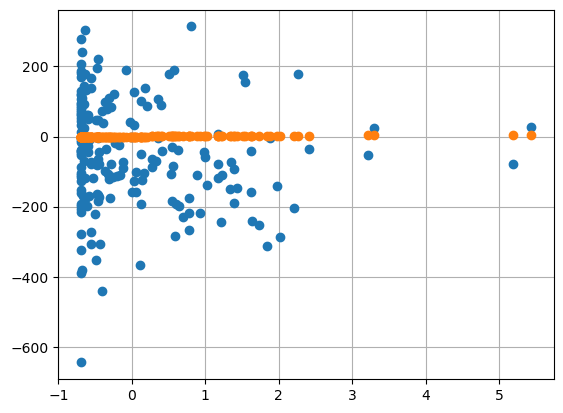

In [41]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [42]:
steps1 = [('scaler', StandardScaler()), ('SVM', SVR())]
pipeline1 = Pipeline(steps1) 
grid1 = GridSearchCV(pipeline1, param_grid= {'SVM__C':[100], 'SVM__gamma':['auto'], 'SVM__kernel': ['rbf'],
                                           'SVM__epsilon':[0.001]},cv = 5, refit=True,verbose=3, n_jobs = -1)
grid1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model10 = grid1.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Primero vemos las metricas
Model| R2 sq on train set: 0.7593
Model| R2 sq on test set: 0.4099
Model| MSE on test set: 0.6145
Model| MAE on test set: 0.3644
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

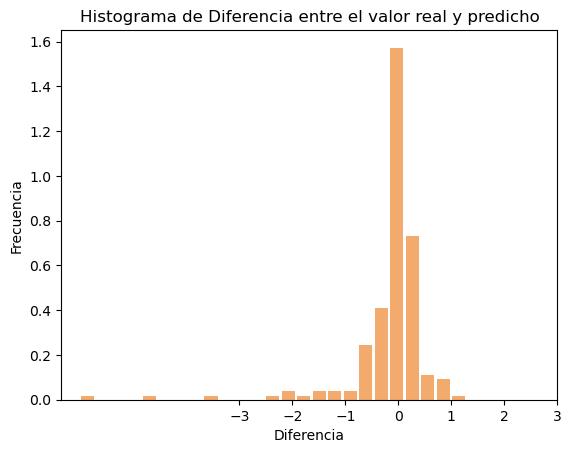

In [43]:
print('Primero vemos las metricas')
abr_score = model10.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model10.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model10.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

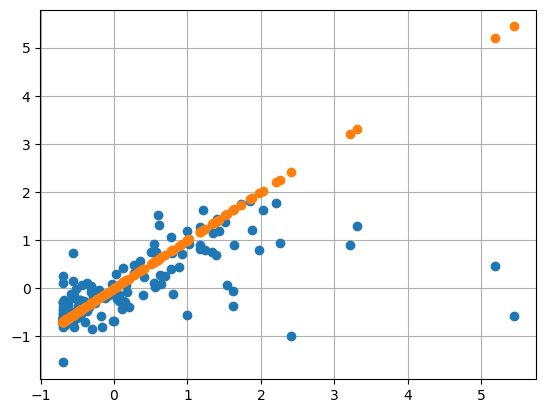

In [44]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show